In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
for i in df.columns:
    print(f'{i} ({df[i].nunique()}) => {df[i].unique()})')
    print(30 * '-')

Age (50) => [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71])
------------------------------
Sex (2) => ['M' 'F'])
------------------------------
ChestPainType (4) => ['ATA' 'NAP' 'ASY' 'TA'])
------------------------------
RestingBP (67) => [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164])
------------------------------
Cholesterol (222) => [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 17

## Exploratory Data Analysis - EDA

([<matplotlib.axis.XTick at 0x7bd420d6f1f0>,
 [Text(0, 0, 'Benign'), Text(1, 0, 'Malignant')])

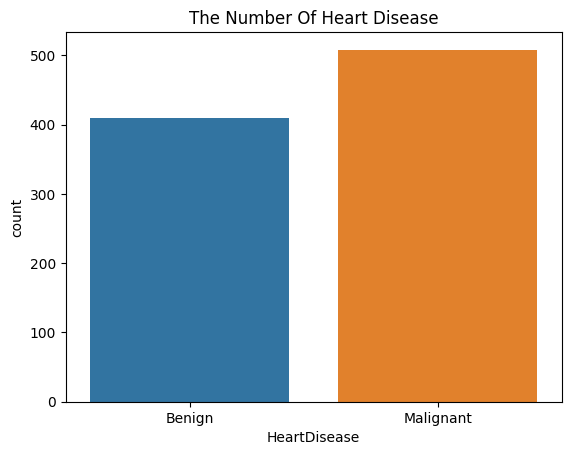

In [9]:
# No have Imbalance
sns.countplot(data = df, x = 'HeartDisease')
plt.title('The Number Of Heart Disease')
plt.xticks([0, 1], ['Benign', 'Malignant'])

In [10]:
np.round(df['Sex'].value_counts(normalize = True) * 100 , 2)

Sex
M    78.98
F    21.02
Name: proportion, dtype: float64

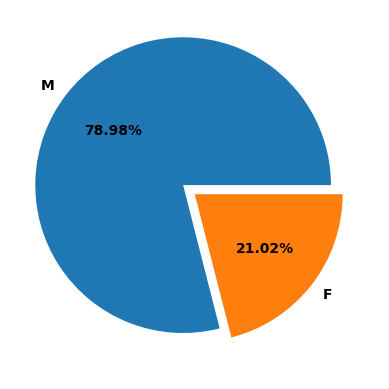

In [11]:
plt.pie(df['Sex'].value_counts(), labels = df['Sex'].value_counts().index, autopct='%.2f%%', explode = (0.1, 0), textprops={"fontweight":"black"})
plt.show()

Text(0.5, 1.0, 'Number Of Male & Female Is Disease')

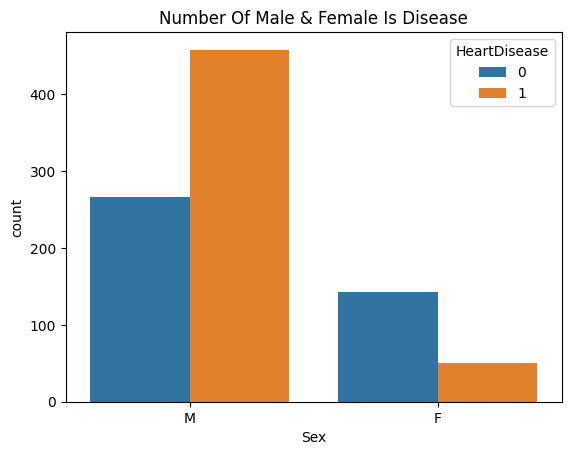

In [12]:
sns.countplot(data = df, x = 'Sex', hue = 'HeartDisease')
plt.title('Number Of Male & Female Is Disease')

- The Most of the patients are males

In [13]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0.5, 1.0, 'The RelationShip Between Age And HeartDisease')

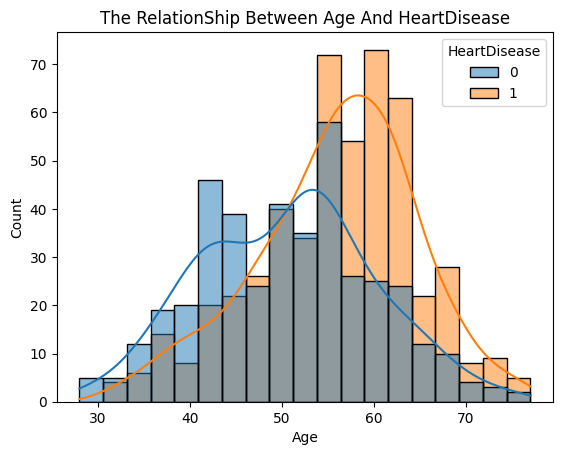

In [14]:
sns.histplot(data = df, x = 'Age', hue = 'HeartDisease', kde = True)
plt.title('The RelationShip Between Age And HeartDisease')


- When Age Increases The Heart Disease Increase

In [15]:
categorical_cols = df.select_dtypes(include = 'O').columns
categorical_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [16]:
numerical_cols = df.select_dtypes(include = 'number').columns
numerical_cols

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

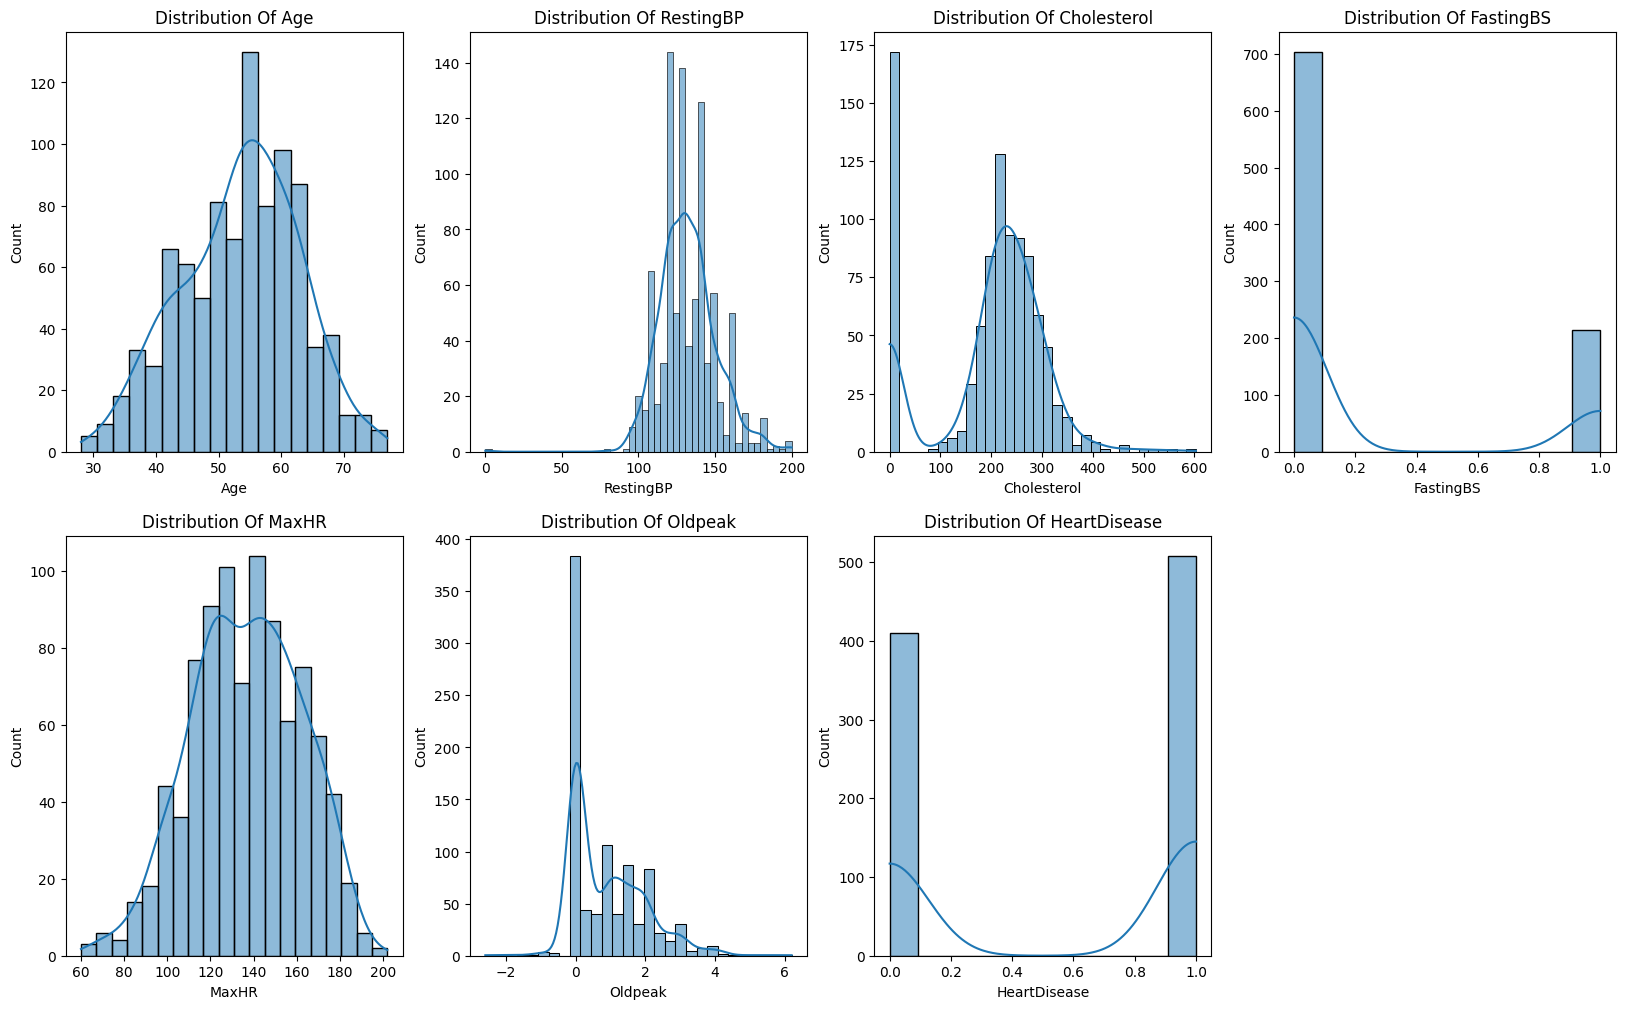

In [17]:
plt.figure(figsize = (20, 12))
for ind, val in enumerate(numerical_cols):
    plt.subplot(2,4, ind + 1)
    sns.histplot(data = df, x = val, kde = True)
    plt.title(f'Distribution Of {val}')

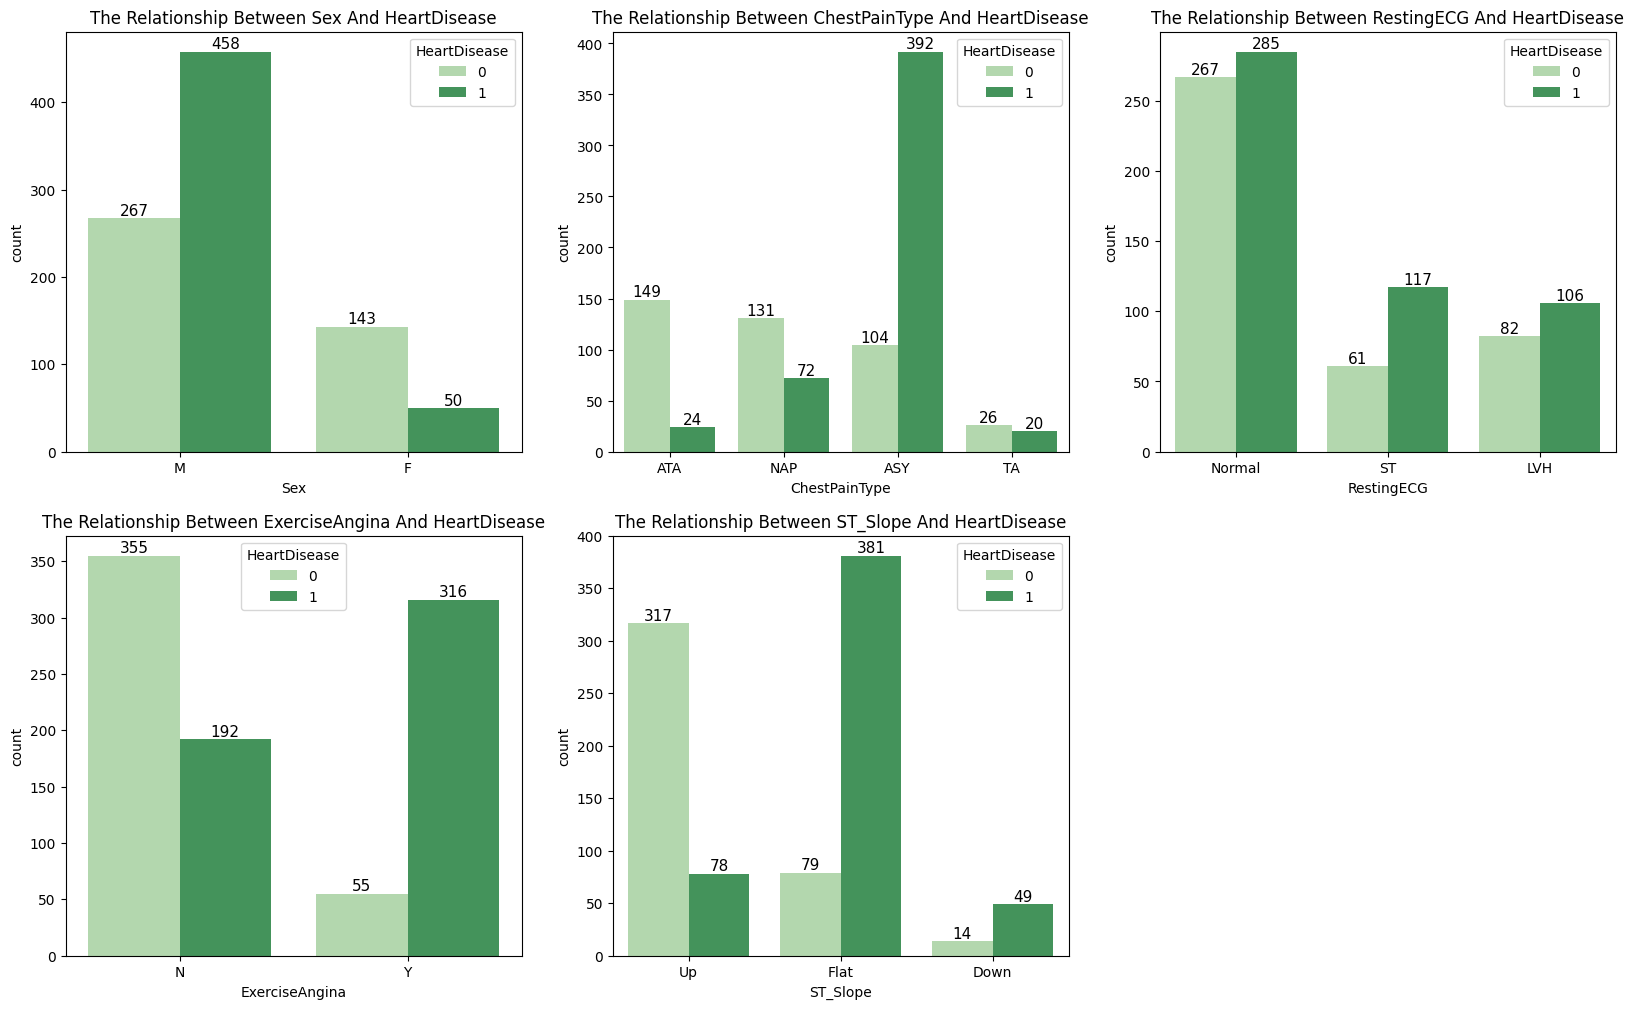

In [18]:
plt.figure(figsize = (20, 12))
for ind, val in enumerate(categorical_cols):
    plt.subplot(2, 3, ind + 1)
    ax = sns.countplot(data = df, x = val, hue = df['HeartDisease'], palette = 'Greens')
    plt.title(f'The Relationship Between {val} And HeartDisease')
    for container in ax.containers:
        ax.bar_label(container, size = 11)

* The number of patients at Y is greater than at N in (ExerciseAngina)
* The Most of the patients are males
* The effect of the type of chest pain on the disease Is Bigger When ASY > NAP > ATA > TA
* The effect of the ST_Slope on the disease Is Bigger When Flat > Up > Down

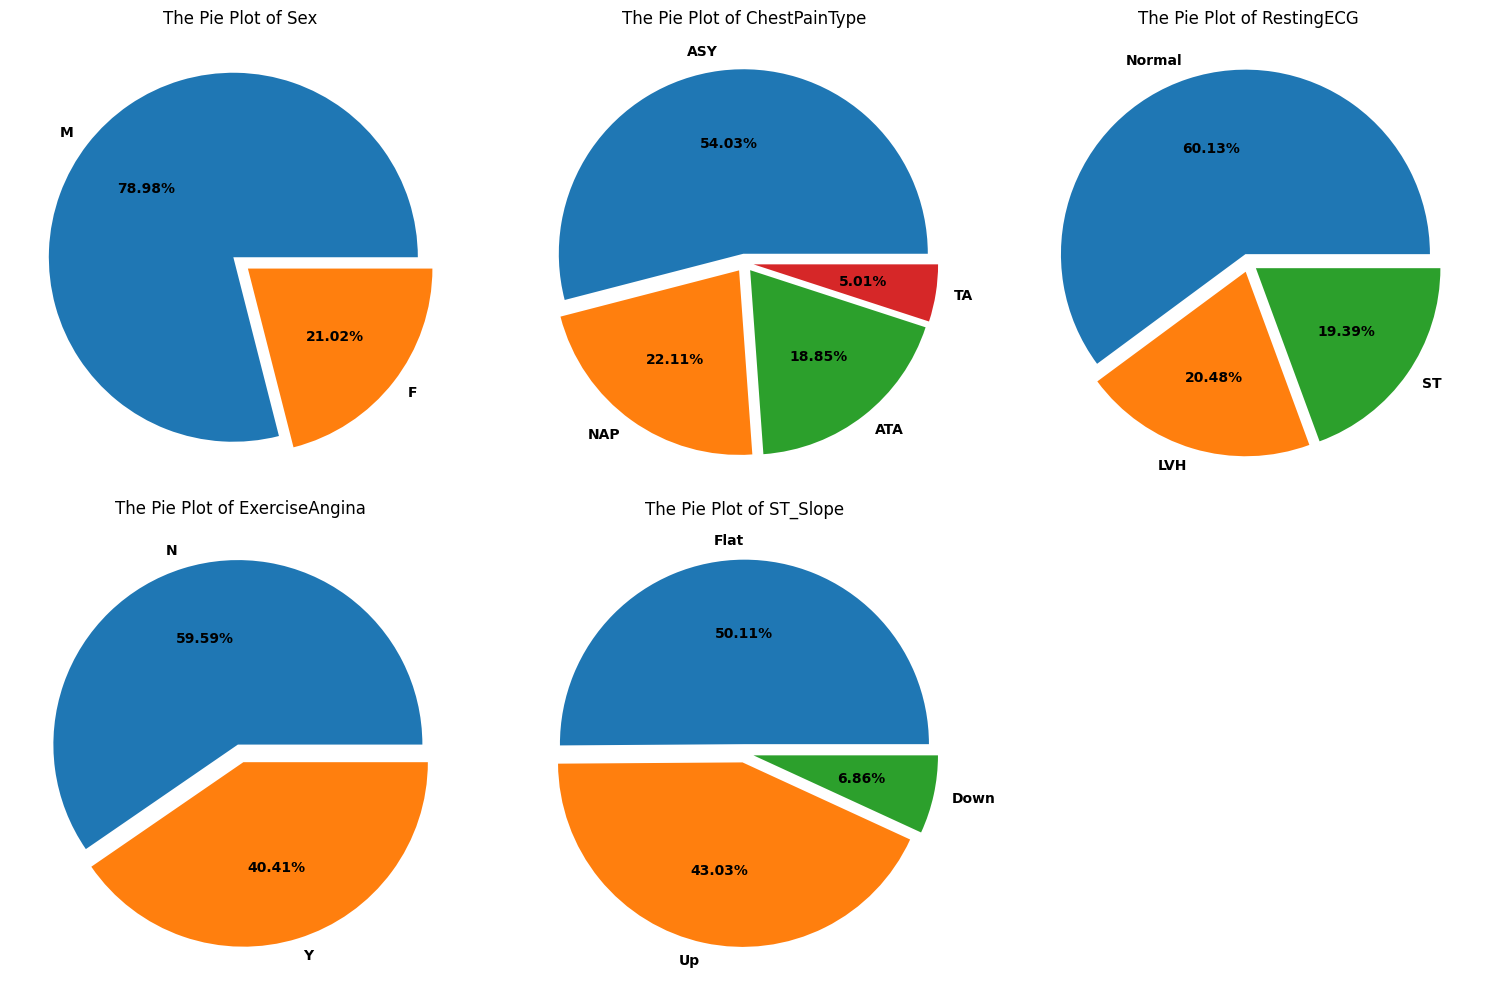

In [19]:
plt.figure(figsize = (15, 10))
for ind, val in enumerate(categorical_cols):
    plt.subplot(2,3, ind+1)
    plt.pie(df[val].value_counts(), labels = df[val].value_counts().index, autopct = '%0.2f%%', explode=[0.05] * df[val].nunique(), textprops={"fontweight":"black"})
    plt.title(f'The Pie Plot of {val}')

plt.tight_layout()
plt.show()

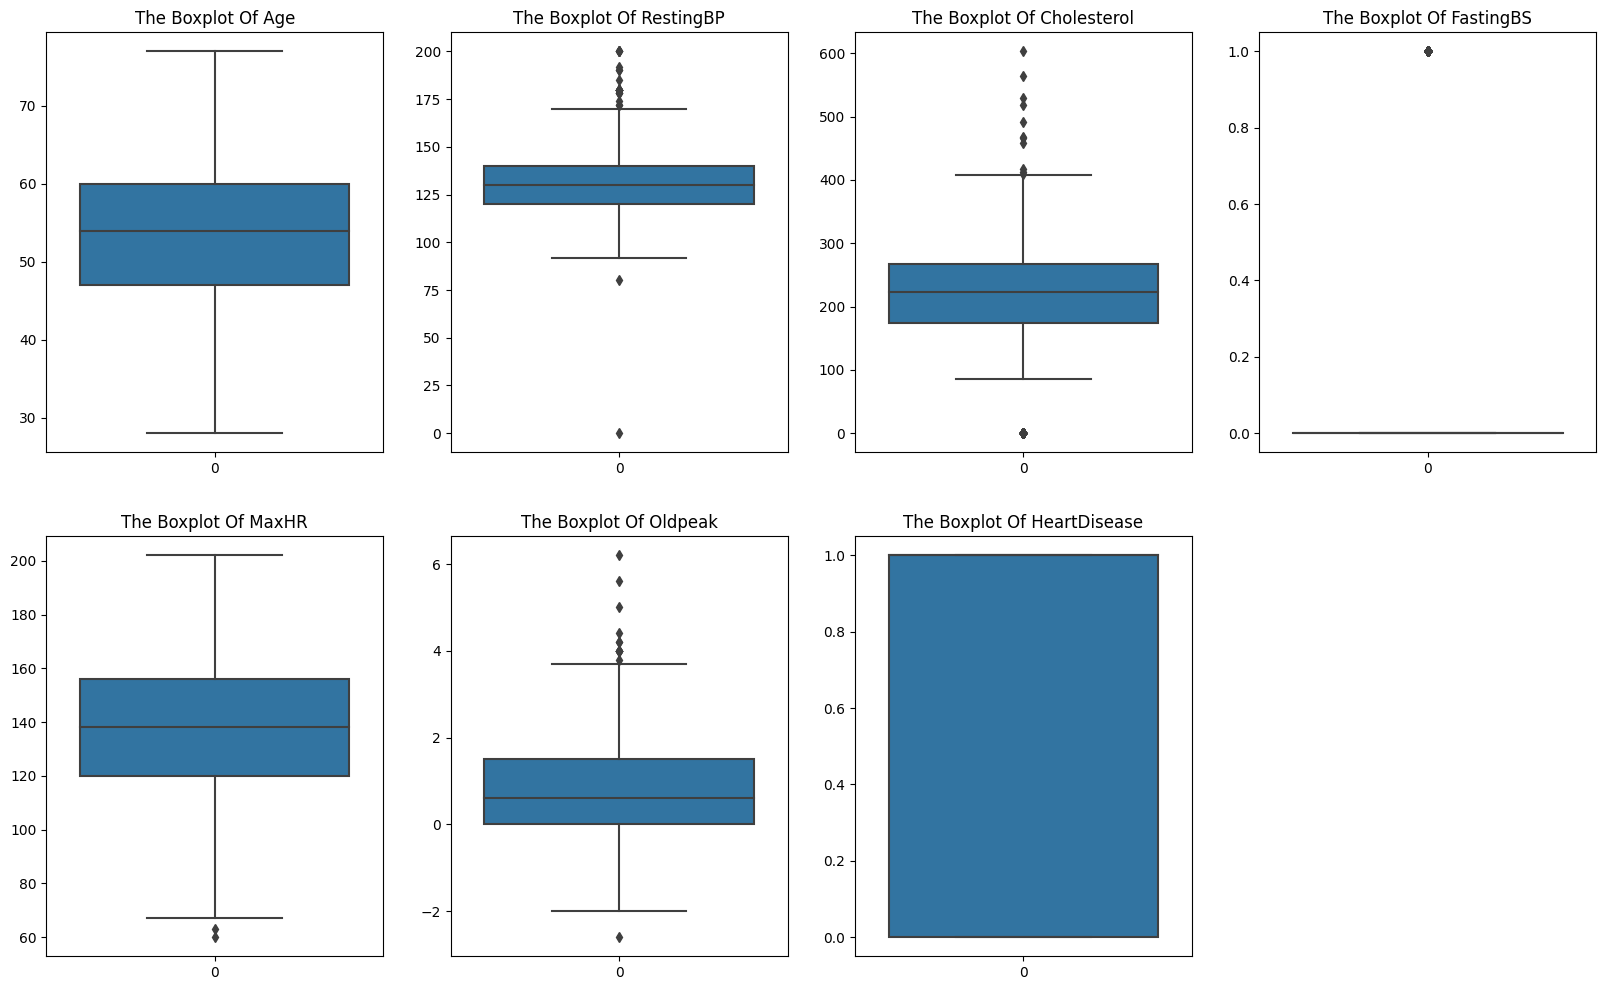

In [20]:
plt.figure(figsize = (20, 12))
for ind, val in enumerate(numerical_cols):
    plt.subplot(2,4, ind + 1)
    sns.boxplot(df[val])
    plt.title(f'The Boxplot Of {val}')

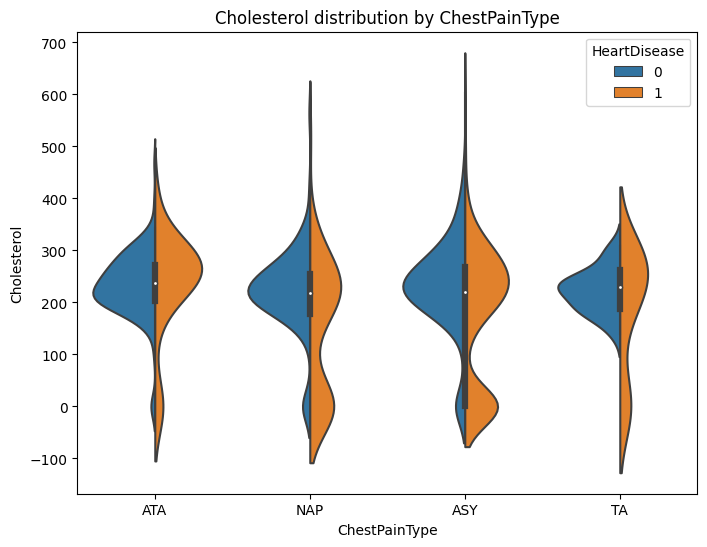

In [21]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='ChestPainType', y='Cholesterol', hue='HeartDisease', split=True)
plt.title('Cholesterol distribution by ChestPainType')
plt.show()

In [22]:
df.groupby(df['ChestPainType'])['Age'].max()

ChestPainType
ASY    77
ATA    74
NAP    76
TA     74
Name: Age, dtype: int64

In [23]:
len(df[df['Cholesterol'] == 0])

172

In [24]:
df.drop(df[df['Cholesterol'] == 0].index, axis=0, inplace=True)

<Axes: >

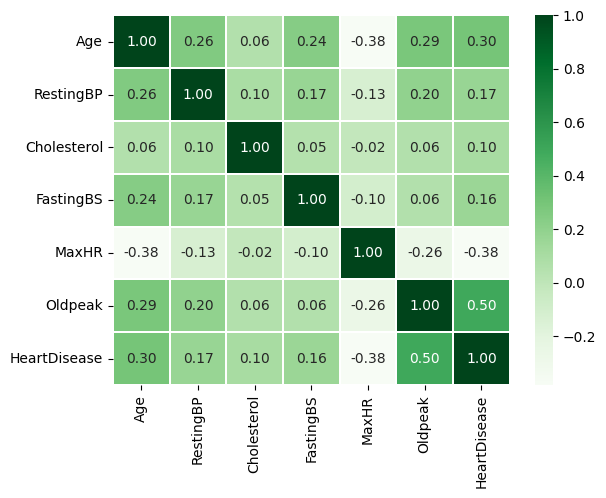

In [25]:
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot = True, fmt = '0.2f', lw = 0.2, cmap = 'Greens')

## Data Modeling

In [26]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [27]:
encoder = LabelEncoder()

for i in categorical_cols:
    X[i] = encoder.fit_transform(X[i])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

### Logistic Regression

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
lr.score(X_train, y_train)

0.8489932885906041

In [31]:
y_pred = lr.predict(X_test)

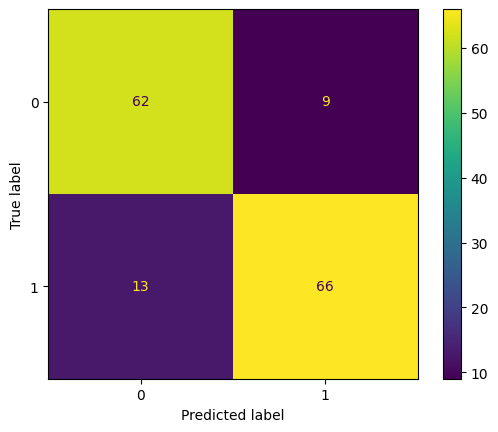

In [32]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [33]:
accuracy_lr = accuracy_score(y_test, y_pred)
accuracy_lr

0.8533333333333334

### Support Vector Machine - SVM

In [34]:
svm = SVC(C= 10)

In [35]:
svm.fit(X_train, y_train)

SVC(C=10)

In [36]:
svm.score(X_train, y_train)

0.7114093959731543

In [37]:
y_pred = svm.predict(X_test)

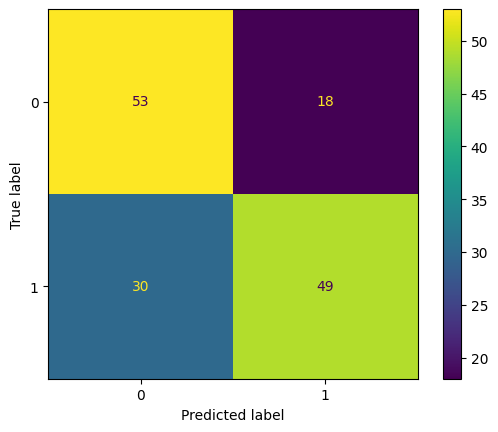

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [39]:
accuracy_svm = accuracy_score(y_test, y_pred)
accuracy_svm

0.68

### Random Forest Classifier

In [40]:
rf = RandomForestClassifier(n_estimators = 10, max_depth = 6)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=10)

In [41]:
rf.score(X_train, y_train)

0.9110738255033557

In [42]:
y_pred = rf.predict(X_test)

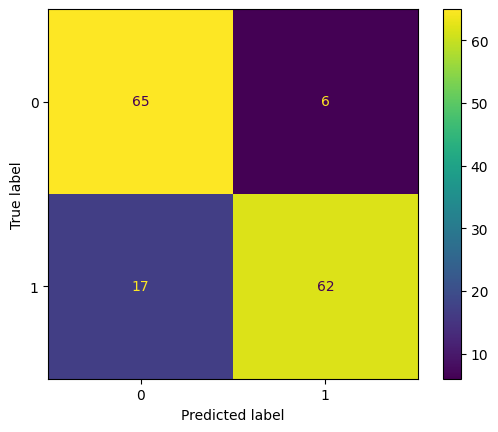

In [43]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [44]:
accuracy_rf = accuracy_score(y_test, y_pred)
accuracy_rf

0.8466666666666667

### Bagging

In [45]:
estimator = SVC()

In [46]:
bagg = BaggingClassifier(estimator=estimator, n_estimators=10)
bagg.fit(X_train, y_train)

BaggingClassifier(estimator=SVC())

In [47]:
bagg.score(X_train, y_train)

0.6946308724832215

In [48]:
y_pred = bagg.predict(X_test)

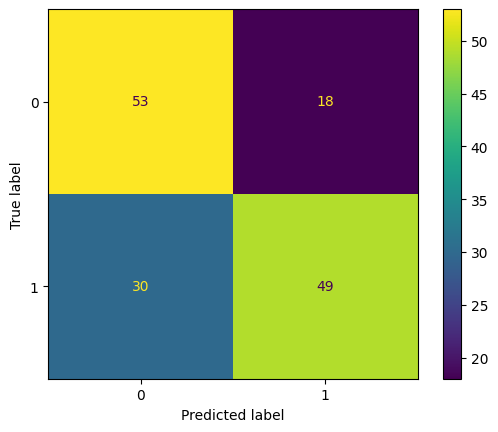

In [49]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [50]:
accuracy_bagging = accuracy_score(y_test, y_pred)
accuracy_bagging

0.68

### ExtraTrees Classifier

In [51]:
trees = ExtraTreesClassifier(n_estimators = 10, max_depth = 6)

trees.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=6, n_estimators=10)

In [52]:
trees.score(X_train, y_train)

0.9060402684563759

In [53]:
y_pred = trees.predict(X_test)

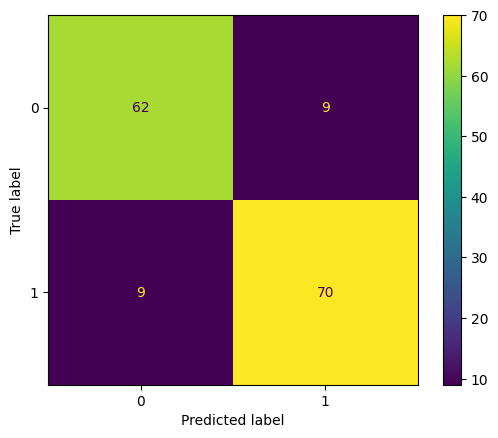

In [54]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [55]:
accuracy_trees = accuracy_score(y_test, y_pred)
accuracy_trees

0.88

### XGBClassifier

In [56]:
# the estimator is Decision Tree
xgb = XGBClassifier(n_estimators = 5)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
xgb.score(X_train,y_train)

0.9395973154362416

In [58]:
y_pred = xgb.predict(X_test)

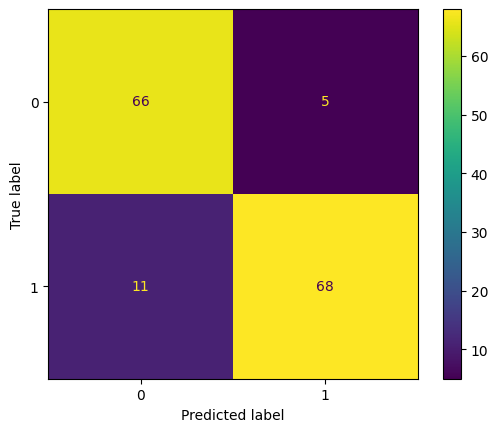

In [59]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [60]:
accuracy_xgb = accuracy_score(y_test,y_pred)
accuracy_xgb

0.8933333333333333

### CatBoost

In [61]:
est = LogisticRegression()
ada = AdaBoostClassifier()

In [62]:
cat = CatBoostClassifier(n_estimators = 10)

cat.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.5340917	total: 52.3ms	remaining: 471ms
1:	learn: 0.4461916	total: 53.1ms	remaining: 212ms
2:	learn: 0.3917092	total: 53.7ms	remaining: 125ms
3:	learn: 0.3605452	total: 54.4ms	remaining: 81.7ms
4:	learn: 0.3380031	total: 55.1ms	remaining: 55.1ms
5:	learn: 0.3263493	total: 56ms	remaining: 37.3ms
6:	learn: 0.3147154	total: 56.7ms	remaining: 24.3ms
7:	learn: 0.3024367	total: 57.5ms	remaining: 14.4ms
8:	learn: 0.2945134	total: 58.2ms	remaining: 6.47ms
9:	learn: 0.2821145	total: 59.1ms	remaining: 0us


In [63]:
cat.score(X_train, y_train)

0.8959731543624161

In [64]:
y_pred = cat.predict(X_test)

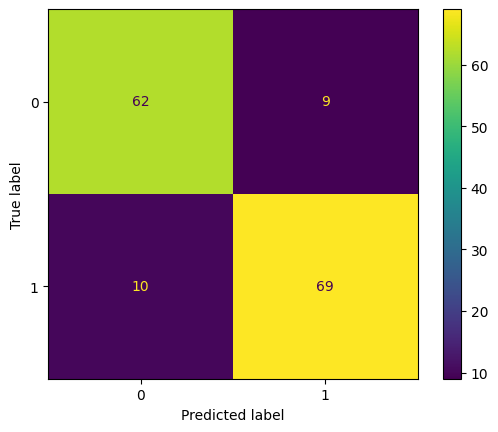

In [65]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [66]:
accuracy_cat = accuracy_score(y_test,y_pred)
accuracy_cat

0.8733333333333333

### LGBMClassifier

In [67]:
lgbm = LGBMClassifier(n_estimators = 10)

lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 277, number of negative: 319
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.464765 -> initscore=-0.141174
[LightGBM] [Info] Start training from score -0.141174
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMClassifier(n_estimators=10)

In [68]:
lgbm.score(X_train, y_train)

0.8942953020134228

In [69]:
y_pred = lgbm.predict(X_test)

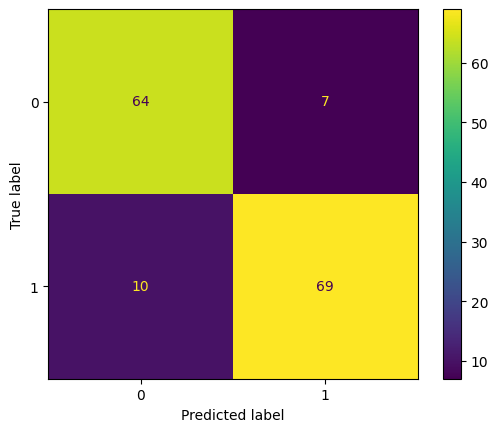

In [70]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [71]:
accuracy_lgbm = accuracy_score(y_test,y_pred)
accuracy_lgbm

0.8866666666666667

In [72]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'SVM', 'Random Forest', 'Bagging', 'ExtraTrees', 'XGBClassifier', 'Catboost', 'LGBMClassifier'],
    'Accuracy': [100 * round(accuracy_lr, 4), 100 * round(accuracy_svm, 4), 100 * round(accuracy_rf, 4), 100 * round(accuracy_bagging, 4), 100 * round(accuracy_trees, 4), 100 * round(accuracy_xgb, 4), 100 * round(accuracy_cat, 4), 100 * round(accuracy_lgbm, 4)]
})

In [73]:
models = models.sort_values(by = 'Accuracy', ascending = False)
models

,Model,Accuracy
5,XGBClassifier,89.33
7,LGBMClassifier,88.67
4,ExtraTrees,88.00
6,Catboost,87.33
0,Logistic Regression,85.33
2,Random Forest,84.67
3,Bagging,68.00
1,SVM,68.00


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'XGBClassifier'),
  Text(1, 0, 'LGBMClassifier'),
  Text(2, 0, 'ExtraTrees'),
  Text(3, 0, 'Catboost'),
  Text(4, 0, 'Logistic Regression'),
  Text(5, 0, 'Random Forest'),
  Text(6, 0, 'Bagging'),
  Text(7, 0, 'SVM')])

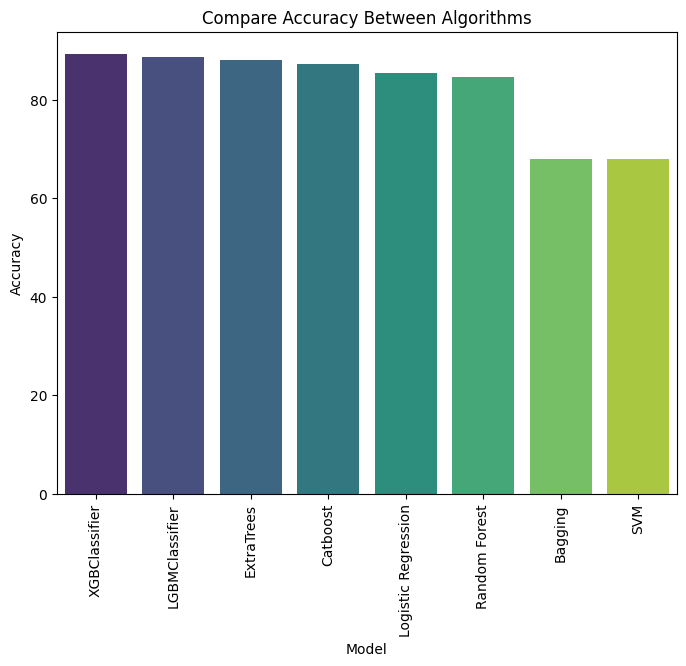

In [74]:
plt.figure(figsize = (8,6))
plt.title("Compare Accuracy Between Algorithms")
sns.barplot(data = models, x = 'Model', y = 'Accuracy', palette = 'viridis')
plt.xticks(rotation = 90)